In [1]:
import pandas as pd

#### Procesamiento de taxis

Para simular una carga incremental en la nube, el ultimo mes de datos no se utilizaran.

In [43]:
green_2301 = pd.read_parquet('descargas/green_tripdata_2023-01.parquet',engine='pyarrow')
green_2302 = pd.read_parquet('descargas/green_tripdata_2023-02.parquet',engine='pyarrow')
green_2303 = pd.read_parquet('descargas/green_tripdata_2023-03.parquet',engine='pyarrow')
green_2304 = pd.read_parquet('descargas/green_tripdata_2023-04.parquet',engine='pyarrow')
green_2305 = pd.read_parquet('descargas/green_tripdata_2023-05.parquet',engine='pyarrow')
green_2306 = pd.read_parquet('descargas/green_tripdata_2023-06.parquet',engine='pyarrow')
green_2307 = pd.read_parquet('descargas/green_tripdata_2023-07.parquet',engine='pyarrow')
green_2308 = pd.read_parquet('descargas/green_tripdata_2023-08.parquet',engine='pyarrow')
green_2309 = pd.read_parquet('descargas/green_tripdata_2023-09.parquet',engine='pyarrow')
green_2310 = pd.read_parquet('descargas/green_tripdata_2023-10.parquet',engine='pyarrow')
green_2311 = pd.read_parquet('descargas/green_tripdata_2023-11.parquet',engine='pyarrow')
green_2312 = pd.read_parquet('descargas/green_tripdata_2023-12.parquet',engine='pyarrow')
green_2401 = pd.read_parquet('descargas/green_tripdata_2024-01.parquet',engine='pyarrow')
green_2402 = pd.read_parquet('descargas/green_tripdata_2024-02.parquet',engine='pyarrow')
green_2403 = pd.read_parquet('descargas/green_tripdata_2024-03.parquet',engine='pyarrow')
green_2404 = pd.read_parquet('descargas/green_tripdata_2024-04.parquet',engine='pyarrow')
green_2405 = pd.read_parquet('descargas/green_tripdata_2024-05.parquet',engine='pyarrow')
green_2406 = pd.read_parquet('descargas/green_tripdata_2024-06.parquet',engine='pyarrow')
#green_2407 = pd.read_parquet('descargas/green_tripdata_2024-07.parquet',engine='pyarrow')

In [44]:
df_taxis_green = [green_2301,green_2302,green_2303,green_2304,green_2305,
               green_2306,green_2307,green_2308,green_2309,green_2310,green_2311,
               green_2312,green_2401,green_2402,green_2403,green_2404,green_2405,green_2406]
print(type(df_taxis_green))

<class 'list'>


In [45]:
# Concateamos para crear uno solo
df_taxis_green = pd.concat(df_taxis_green, ignore_index=True)
df_taxis_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126867 entries, 0 to 1126866
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1126867 non-null  int64         
 1   lpep_pickup_datetime   1126867 non-null  datetime64[us]
 2   lpep_dropoff_datetime  1126867 non-null  datetime64[us]
 3   store_and_fwd_flag     1057035 non-null  object        
 4   RatecodeID             1057035 non-null  float64       
 5   PULocationID           1126867 non-null  int64         
 6   DOLocationID           1126867 non-null  int64         
 7   passenger_count        1057035 non-null  float64       
 8   trip_distance          1126867 non-null  float64       
 9   fare_amount            1126867 non-null  float64       
 10  extra                  1126867 non-null  float64       
 11  mta_tax                1126867 non-null  float64       
 12  tip_amount             11268

1. **VendorID**: Un código que representa al proveedor de tecnología (TPEP) que proporcionó el registro del viaje.
   - `1`: Creative Mobile Technologies, LLC
   - `2`: VeriFone Inc.
2. **tpep_pickup_datetime**: Fecha y hora en que se inició el viaje (se activó el taxímetro).
3. **tpep_dropoff_datetime**: Fecha y hora en que finalizó el viaje (se desactivó el taxímetro).
4. **Passenger_count**: Cantidad de pasajeros reportados para el viaje. Este dato es ingresado manualmente por el conductor.
5. **Trip_distance**: Distancia recorrida durante el viaje, reportada en millas.
6. **PULocationID**: ID de la zona de taxi TLC donde comenzó el viaje.
7. **DOLocationID**: ID de la zona de taxi TLC donde terminó el viaje.
8. **RateCodeID**: Código de la tarifa aplicada para el viaje.
   - `1`: Tarifa estándar
   - `2`: JFK
   - `3`: Newark
   - `4`: Nassau o Westchester
   - `5`: Tarifa negociada
   - `6`: Viaje en grupo
9. **Store_and_fwd_flag**: Indica si el registro del viaje fue almacenado temporalmente en la memoria del vehículo debido a problemas de conectividad.
   - `Y`: Sí, almacenado y enviado más tarde
   - `N`: No, enviado en tiempo real
10. **Payment_type**: Método de pago utilizado.
    - `1`: Tarjeta de crédito
    - `2`: Efectivo
    - `3`: Sin cargo
    - `4`: Disputa
    - `5`: Desconocido
    - `6`: Viaje anulado
11. **Fare_amount**: Monto de la tarifa calculada en base al tiempo y distancia por el taxímetro.
12. **Extra**: Cargos adicionales (como cargos por hora pico o nocturnos).
13. **MTA_tax**: Un impuesto de $0.50 para la Autoridad Metropolitana de Transporte (MTA).
14. **Improvement_surcharge**: Un recargo de $0.30 que se aplica desde 2015.
15. **Tip_amount**: Propinas recibidas, automáticamente registradas para pagos con tarjeta de crédito (las propinas en efectivo no se incluyen).
16. **Tolls_amount**: Total de peajes pagados durante el viaje.
17. **Total_amount**: El total del viaje, excluyendo las propinas en efectivo.
18. **Congestion_Surcharge**: Recargo por congestión recolectado para el programa de tarifas de congestión del Estado de Nueva York.
19. **Airport_fee**: Un recargo de $1.25 para recogidas en los aeropuertos LaGuardia y JFK.

In [46]:
df_taxis_green.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag         69832
RatecodeID                 69832
PULocationID                   0
DOLocationID                   0
passenger_count            69832
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1126867
improvement_surcharge          0
total_amount                   0
payment_type               69832
trip_type                  69926
congestion_surcharge       69832
dtype: int64

#### Para lograr los objetivos de la empresa, se decidieron utilizar solamente las columnas de:

- pickup_datetime
- dropoff_datetime
- PULocationID      
- DOLocationID      
- passenger_count
- trip_distance
- tip_amount
- amount


In [47]:
drop_cols = ['store_and_fwd_flag', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                    'ehail_fee', 'congestion_surcharge', 'trip_type', 'VendorID', 'RatecodeID', 'payment_type']

# Eliminamos las columnas de la lista
df_taxis_green.drop(columns=drop_cols, inplace=True)
# Renombramos las columnas
df_taxis_green.rename(columns={'lpep_pickup_datetime': 'pickup_datetime','lpep_dropoff_datetime': 'dropoff_datetime',
                            'total_amount': 'amount'}, inplace=True)
df_taxis_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126867 entries, 0 to 1126866
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   pickup_datetime   1126867 non-null  datetime64[us]
 1   dropoff_datetime  1126867 non-null  datetime64[us]
 2   PULocationID      1126867 non-null  int64         
 3   DOLocationID      1126867 non-null  int64         
 4   passenger_count   1057035 non-null  float64       
 5   trip_distance     1126867 non-null  float64       
 6   tip_amount        1126867 non-null  float64       
 7   amount            1126867 non-null  float64       
dtypes: datetime64[us](2), float64(4), int64(2)
memory usage: 68.8 MB


Las columnas de tip_amount y amount, se sumaran para tener una variable donde exprese la cantidad total del dinero que gasto el cliente.

In [48]:
# Sumamos las columnas amount y tip_amount para crear la columna total_price
df_taxis_green['total_price'] = df_taxis_green['amount'] + df_taxis_green['tip_amount']
df_taxis_green.drop(columns=['amount', 'tip_amount'], inplace=True)

Debido a que las columnas con cantidad de pasajeros y distancia del viaje pueden llegar a ser 0, se procedio a eliminar las filas que posean 0 en estas columnas.

In [49]:
print(df_taxis_green['passenger_count'].value_counts(),df_taxis_green['trip_distance'].value_counts())


passenger_count
1.0    891297
2.0     94581
5.0     27804
6.0     15144
3.0     13620
0.0      9260
4.0      5190
7.0        57
9.0        43
8.0        39
Name: count, dtype: int64 trip_distance
0.00        57261
1.40        10015
1.30         9529
1.20         8453
1.50         8092
            ...  
62.55           1
58.74           1
44.51           1
107.97          1
33967.47        1
Name: count, Length: 4283, dtype: int64


In [50]:
df_taxis_green = df_taxis_green[df_taxis_green['passenger_count'] != 0.0]
df_taxis_green = df_taxis_green[df_taxis_green['trip_distance'] != 0.0]

In [51]:
# Verificamos nulos
print(df_taxis_green['passenger_count'].isnull().sum())
# Debido a que sabemos que se efectuo el pago, completamos los valores nulos de la columna passenger_count con el valor 1.
df_taxis_green['passenger_count'].fillna(1, inplace=True)
df_taxis_green['passenger_count'].isnull().sum()

67546


0

#### Creacion de la columna "service" que sera booleana siendo 1 = "green" y 0 = "yellow"

In [52]:
df_taxis_green['service'] = 1
df_taxis_green.tail(2)

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_price,service
1126864,2024-06-30 19:39:00,2024-06-30 20:00:00,247,151,1.0,3.34,35.93,1
1126866,2024-06-30 22:10:00,2024-06-30 22:40:00,61,112,1.0,5.14,39.70,1


#### **Yellow Taxis**

In [53]:
yellow_2301 = pd.read_parquet('descargas/yellow_tripdata_2023-01.parquet',engine='pyarrow')
yellow_2302 = pd.read_parquet('descargas/yellow_tripdata_2023-02.parquet',engine='pyarrow')
yellow_2303 = pd.read_parquet('descargas/yellow_tripdata_2023-03.parquet',engine='pyarrow')
yellow_2304 = pd.read_parquet('descargas/yellow_tripdata_2023-04.parquet',engine='pyarrow')
yellow_2305 = pd.read_parquet('descargas/yellow_tripdata_2023-05.parquet',engine='pyarrow')
yellow_2306 = pd.read_parquet('descargas/yellow_tripdata_2023-06.parquet',engine='pyarrow')
yellow_2307 = pd.read_parquet('descargas/yellow_tripdata_2023-07.parquet',engine='pyarrow')
yellow_2308 = pd.read_parquet('descargas/yellow_tripdata_2023-08.parquet',engine='pyarrow')
yellow_2309 = pd.read_parquet('descargas/yellow_tripdata_2023-09.parquet',engine='pyarrow')
yellow_2310 = pd.read_parquet('descargas/yellow_tripdata_2023-10.parquet',engine='pyarrow')
yellow_2311 = pd.read_parquet('descargas/yellow_tripdata_2023-11.parquet',engine='pyarrow')
yellow_2312 = pd.read_parquet('descargas/yellow_tripdata_2023-12.parquet',engine='pyarrow')
yellow_2401 = pd.read_parquet('descargas/yellow_tripdata_2024-01.parquet',engine='pyarrow')
yellow_2402 = pd.read_parquet('descargas/yellow_tripdata_2024-02.parquet',engine='pyarrow')
yellow_2403 = pd.read_parquet('descargas/yellow_tripdata_2024-03.parquet',engine='pyarrow')
yellow_2404 = pd.read_parquet('descargas/yellow_tripdata_2024-04.parquet',engine='pyarrow')
yellow_2405 = pd.read_parquet('descargas/yellow_tripdata_2024-05.parquet',engine='pyarrow')
yellow_2406 = pd.read_parquet('descargas/yellow_tripdata_2024-06.parquet',engine='pyarrow')
#green_2407 = pd.read_parquet('descargas/yellow_tripdata_2024-07.parquet',engine='pyarrow')

In [54]:
df_taxis_yellow = [yellow_2301,yellow_2302,yellow_2303,yellow_2304,yellow_2305,yellow_2306,
                   yellow_2307,yellow_2308,yellow_2309,yellow_2310,yellow_2311,yellow_2312,
                   yellow_2401,yellow_2402,yellow_2403,yellow_2404,yellow_2405,yellow_2406]
print(type(df_taxis_yellow))

df_taxis_yellow = pd.concat(df_taxis_yellow, ignore_index=True)
df_taxis_yellow.info()

print(df_taxis_yellow.isna().sum())

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58642319 entries, 0 to 58642318
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airpo

In [55]:
drop_cols = ['store_and_fwd_flag', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                    'congestion_surcharge', 'VendorID', 'RatecodeID', 'payment_type','airport_fee','Airport_fee']

# Eliminamos las columnas de la lista
df_taxis_yellow.drop(columns=drop_cols, inplace=True)

# Renombramos las columnas
df_taxis_yellow.rename(columns={'tpep_pickup_datetime': 'pickup_datetime','tpep_dropoff_datetime': 'dropoff_datetime',
                            'total_amount': 'amount'}, inplace=True)
df_taxis_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58642319 entries, 0 to 58642318
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   tip_amount        float64       
 7   amount            float64       
dtypes: datetime64[us](2), float64(4), int64(2)
memory usage: 3.5 GB


- pickup_datetime
- dropoff_datetime
- PULocationID      
- DOLocationID      
- passenger_count
- trip_distance
- tip_amount
- amount

In [56]:
# Sumamos las columnas amount y tip_amount para crear la columna total_price
df_taxis_yellow['total_price'] = df_taxis_yellow['amount'] + df_taxis_yellow['tip_amount']
df_taxis_yellow.drop(columns=['amount', 'tip_amount'], inplace=True)

In [57]:
df_taxis_yellow = df_taxis_yellow[df_taxis_yellow['passenger_count'] != 0.0]
df_taxis_yellow = df_taxis_yellow[df_taxis_yellow['trip_distance'] != 0.0]

In [58]:
# Verificamos nulos
print(df_taxis_yellow['passenger_count'].isnull().sum())
# Debido a que sabemos que se efectuo el pago, completamos los valores nulos de la columna passenger_count con el valor 1.
df_taxis_yellow['passenger_count'].fillna(1, inplace=True)
df_taxis_yellow['passenger_count'].isnull().sum()

2869727


0

In [59]:
df_taxis_yellow['service'] = 0
df_taxis_yellow.tail(2)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_price,service
58642317,2024-06-30 23:33:36,2024-06-30 23:42:37,1.0,1.60,158,231,18.41,0
58642318,2024-06-30 23:04:50,2024-06-30 23:11:15,1.0,1.28,158,186,16.40,0


In [60]:
df_taxis_yellow.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'total_price',
       'service'],
      dtype='object')

In [61]:
new_order = ['pickup_datetime', 'dropoff_datetime', 'passenger_count',
             'trip_distance', 'PULocationID', 'DOLocationID','total_price','service']
df_taxis_green = df_taxis_green.reindex(columns=new_order)

In [62]:
# Concatenamos los DataFrames de yellow y green taxis
taxis = pd.concat([df_taxis_yellow, df_taxis_green], ignore_index=True)
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57785408 entries, 0 to 57785407
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   total_price       float64       
 7   service           int64         
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 3.4 GB


In [63]:
taxis.pickup_datetime.min()

Timestamp('2001-01-01 00:06:49')

In [64]:
taxis.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'total_price',
       'service'],
      dtype='object')

In [65]:
taxis = taxis.sort_values(by='pickup_datetime')

In [66]:
taxis.head(2)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_price,service
7022616,2001-01-01 00:06:49,2001-01-01 15:42:11,2.0,7.41,161,231,53.9,0
12041332,2001-01-01 00:07:36,2001-01-01 00:16:31,1.0,1.68,239,43,14.7,0


Debido a la existencia de algunos datos que su fecha no corresponde con los años extraidos, se procedera a aplicar una mascara para su filtrado.

In [67]:
print(taxis.shape)
taxis = taxis[(taxis['pickup_datetime'].dt.year == 2023) | (taxis['pickup_datetime'].dt.year == 2024)]
print(taxis.shape)

(57785408, 8)
(57785287, 8)


In [68]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57785287 entries, 2906736 to 56322147
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[us]
 1   dropoff_datetime  datetime64[us]
 2   passenger_count   float64       
 3   trip_distance     float64       
 4   PULocationID      int64         
 5   DOLocationID      int64         
 6   total_price       float64       
 7   service           int64         
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 3.9 GB


In [1]:
from funciones import get_borough

In [5]:
taxis = pd.read_parquet('Data\process_taxis.parquet',engine='pyarrow')
taxis['pickup_borough'] = taxis['PULocationID'].apply(get_borough)
taxis['dropoff_borough'] = taxis['DOLocationID'].apply(get_borough)

In [69]:
# Extraer año, trimestre, mes, día del mes, día de la semana y hora
#taxis['year'] = taxis['pickup_datetime'].dt.year
#taxis['quarter'] = taxis['pickup_datetime'].dt.quarter
#taxis['month'] = taxis['pickup_datetime'].dt.month
#taxis['day_month'] = taxis['pickup_datetime'].dt.day
#taxis['weekday'] = taxis['pickup_datetime'].dt.day_name()
#taxis['hour'] = taxis['pickup_datetime'].dt.hour
#taxis.drop(columns=['pickup_datetime','dropoff_datetime'],inplace=True)

In [75]:
taxis.to_parquet('Data\process_taxis.parquet',engine='pyarrow')

In [76]:
del taxis
del df_taxis_green
del df_taxis_yellow

#### Fuel data

Para comprender mejor estos datos, a continuacion veremos algunas de las columnas que representan:

#### **Vehículos tradicionales/híbridos**
archivo: **fuel-consumption-ratings**
- **Año** El año utilizado por el fabricante para designar un modelo de vehículo.
- **Marca** El fabricante del vehículo
- **Modelo** El nombre del modelo del vehículo.
- **ategoría de vehículo** Clasificación de vehículos basada en el volumen interior para automóviles y el peso bruto vehicular para camionetas ligeras
- **Desplazamiento (L)** El volumen total de todos los cilindros (en litros)
- **Cilindros** El número de cilindros del motor.
- **Transmisión** El tipo de transmisión y el número de informes/velocidades.
- **Tipo de combustible** El tipo de combustible utilizado para impulsar el vehículo.
- **Ciudad (L/100 km)** Clasificación del consumo de combustible en ciudad mostrada en litros cada 100 kilómetros
- **Carretera (L/100 km)** Clasificación del consumo de combustible en carretera mostrada en litros cada 100 kilómetros
- **Combinado (L/100 km)** Clasificación de consumo de combustible combinado mostrado en litros cada 100 kilómetros
- **Combinado (mpg)** La clasificación combinada expresada en millas por galón imperial (mpg)
- **Emisiones de CO2 (g/km)** Las emisiones de dióxido de carbono de los vehículos se muestran en gramos por kilómetro para conducción combinada en ciudad y carretera.
- **índice de CO2** Emisiones de escape de dióxido de carbono clasificadas en una escala del 1 (peor) al 10 (mejor)
- **índice de smog** Las emisiones de los tubos de escape de contaminantes que causan smog se clasifican en una escala del 1 (peor) al 10 (mejor)

#### **Vehículos eléctricos híbridos enchufables**
archivo: **plug-in-hybrid-electric-vehicles**

- **Año** del modelo El año utilizado por el fabricante para designar un modelo de vehículo.
- **Marca** El fabricante del vehículo.
- **Modelo** El nombre del modelo del vehículo.
- **Categoría de vehículo** La clasificación del vehículo basada en el volumen interior para automóviles y el peso bruto vehicular para camionetas livianas.
- **Motor (kW)** La potencia máxima de un motor eléctrico (en kilovatios)
- **Desplazamiento (L)** El volumen total de todos los cilindros (en litros)
- **Cilindros** El número de cilindros en el motor.
- **Transmisión** El tipo de transmisión y el número de marchas/velocidades.
- **Tipo de combustible 1** El tipo de combustible utilizado para impulsar el vehículo en modo eléctrico.
- **Le combinado/100 km** La clasificación de consumo de combustible combinado para funcionamiento en modo eléctrico expresado en litros equivalentes de gasolina cada 100 kilómetros. Entre paréntesis se muestra el consumo de electricidad en kilovatios hora cada 100 kilómetros y el consumo de gasolina (si corresponde) en litros cada 100 kilómetros.
- **Autonomía 1** Distancia de conducción estimada (en kilómetros) con una batería completamente cargada
- **Tiempo de carga (horas)** El período de tiempo estimado (en horas) para recargar completamente la batería a 240 voltios
- **Tipo de combustible 2** El tipo de combustible utilizado para impulsar el vehículo en modo solo gasolina.
- **Ciudad (L/100 km)** La clasificación de consumo de combustible en ciudad para el modo gasolina solo se muestra en litros cada 100 kilómetros.
- **Carretera (L/100 km)** La clasificación de consumo de combustible en carretera para el modo gasolina solo se muestra en litros cada 100 kilómetros.
- **Combinado (L/100 km)** La clasificación de consumo de combustible combinado para el modo gasolina solo se muestra en litros cada 100 kilómetros.
- **Rango 2** La distancia estimada recorrida con el tanque lleno de combustible.
- **Emisiones de CO2 (g/km)** Emisiones de escape de dióxido de carbono del vehículo mostradas en gramos por kilómetro para conducción combinada en ciudad y carretera
- **Índice de CO2** Emisiones de escape de dióxido de carbono clasificadas en una escala del 1 (peor) al 10 (mejor)
- **Índice de smog** Emisiones de escape de contaminantes que causan smog clasificadas en una escala del 1 (peor) al 10 (mejor)

#### **vehículos eléctricos de batería**
archivo: battery-electric-vehicles

- **Año del modelo** El año utilizado por el fabricante para designar un modelo de vehículo.
- **Marca** El fabricante del vehículo.
- **Modelo** El nombre del modelo del vehículo.
- **Categoría de vehículo** La clasificación del vehículo basada en el volumen interior para automóviles y el peso bruto - vehicular para camionetas livianas.
- **Motor (kW)** La potencia máxima de un motor eléctrico (en kilovatios)
- **Transmisión** El tipo de transmisión y el número de marchas/velocidades.
- **Tipo de combustible** El tipo de combustible utilizado para impulsar el vehículo.
- **Ciudad (kWh/100 km)** La clasificación de consumo de combustible en ciudad se muestra en kilovatios hora cada 100 kilómetros.
- **Carretera (kWh/100 km)** La clasificación de consumo de combustible en carretera se muestra en kilovatios hora cada 100 - kilómetros.
- **Combinado (kWh/100 km)** La clasificación de consumo de combustible combinado se muestra en kilovatios hora cada 100 - kilómetros.
- **Ciudad (Le/100 km)** Índice de consumo de combustible en ciudad expresado en litros equivalentes de gasolina cada 100 - kilómetros.
- **Carretera (Le/100 km)** Índice de consumo de combustible en carretera expresado en litros de gasolina equivalente cada 100 - **kilómetros.
- **Combinado (Le/100 km)** El consumo combinado de combustible se expresa en litros equivalentes de gasolina cada 100 - kilómetros.
- **Autonomía (km)** La distancia de conducción estimada (en kilómetros) recorrida con una batería completamente cargada.
- **Emisiones de CO2 (g/km)** Emisiones de escape de dióxido de carbono del vehículo mostradas en gramos por kilómetro para conducción combinada en ciudad y carretera
- **Índice de CO2** Emisiones de escape de dióxido de carbono clasificadas en una escala del 1 (peor) al 10 (mejor)
- **Índice de smog** Emisiones de escape de contaminantes que causan smog clasificadas en una escala del 1 (peor) al 10 (mejor)
- **Tiempo de carga (horas)** El período de tiempo estimado (en horas) para recargar completamente la batería a 240 voltios.

In [2]:
df_electric = pd.read_csv('descargas/Fuel_rate/my2012-2024-battery-electric-vehicles.csv')
df_hybrid = pd.read_csv('descargas/Fuel_rate/my2012-2024-plug-in-hybrid-electric-vehicles.csv')
df_combustion = pd.read_csv('descargas/Fuel_rate/my2024-fuel-consumption-ratings.csv', encoding='latin-1')

In [7]:
df_electric.value_counts(subset='Fuel type')

Fuel type
B    687
Name: count, dtype: int64

In [12]:
df_hybrid.value_counts(subset='Fuel type 1')

Fuel type 1
B/Z*    133
B/X*     92
B        39
B/Z      21
B/X      11
Name: count, dtype: int64

La B representa que el auto utiliza electricidad y Z o X que tambien puede utilizar gasolina, pero en los casos por ejemplo que poseen un *, es que no utilizaron gasolina durante las pruebas.

### **Presupuesto**

Para el calculo del presupuesto, se procedio a calcular el gasto de los vehiculos por km, por lo que debemos convertir la variable de gasto cada 100 km ya sea en kWh o litros de nafta para ver el gasto por km. Ademas, al no poseer mas informacion acerca del tipo de la unidad, se calculara un promedio para los 2 tipos de energia que puedan llegar a consumir.

#### **precio del kW**

Durante el año 2023, el promedio del gasto del kW es de 13 centavos de dolar pero al encontrarnos con viajes realizados en el estado de New York, el precio promedio del kW en 2022 fue de 22.64 ¢/kWh	y durante el 2023 fue de 19.23¢ / kWh por lo que se realizaran los calculos con un precio de 20 centavos de dolar por cada kWh. **1 kWh = $0.2**

#### **precio del combustible**
El precio de la gasolina en USA puede variar depende la zona, variando desde 3 a 4 dolares por galon del combustible.

Se utilizara de referencia el precio de 3.5 dolares cada galon. 1 galón equivale a aproximadamente 3.785 litros por lo que si utilizamos 3.5 dolares por galon, el litro de combustible costaria 0.92 dolares. 

#### **Desgaste vehicular**

A diferencia de los autos convencionales, los eléctricos tienen menos partes móviles, lo que se traduce en menos desgaste y, por ende, menos gastos de mantenimiento rutinario. Existen algunos factores que diferenciamos de los autos convencionales:

En un auto eléctrico no hay que hacer **cambios de aceite** y **filtros de aceite**, no hay que colocar **líquido refrigerante**, no hay **bujías**, ni **caño de escape**, **motor de arranque**, **radiador de agua**, **correas de distribución o mangueras**. **La transmisión es directa**, no hay **caja de velocidades**, por lo tanto tampoco hay **varillaje ni embrague**.

Segun nuestras fuentes, el gasto en mantenimiento para autos electricos es aproximadamente la mitad que el gasto de los vehiculos convencionales.

Para el desgaste del vehiculo convencional, si consideramos segun la AAA, el costo del mantenimiento y reparo del vehiculo es de 0.09 dolares por milla, lo cual serian 0.15 dolares por km aproximadamente y 0.07 dolares por km para autos electricos.

fuente al final del archivo.

### Ejemplificacion del caso
#### Caso 1) Vehiculo electrico

Supongamos que un automovil electrico gasta 10 kWh cada 100km. Este gasto lo dividimos para obtener el gasto por km. Luego se multiplica este valor por el precio que cuesta la electricidad en este caso 0.2 dolares por kWh. 

(0.1 kWh/km) x (0.2 USD/kWh) = 0.02 USD/km

#### Caso 2) Vehiculo convencional

Supongamos que un automovil convencional gasta 5 litros de gasolina cada 100km. Este gasto lo dividimos para obtener el gasto por km. Luego se multiplica este valor por el precio que cuesta la gasolina en este caso 0.92 dolares por litro.

(0.05 L/km) x (0.92 USD/L) = 0.046 USD/km


In [3]:
df_combustion.sample(10)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
251,2024,Ford,F-150 4X4,Pickup truck: Standard,5.0,8,AS10,X,14.9,10.2,12.8,22,300,4,6
700,2024,Toyota,Corolla Hatchback,Compact,2.0,4,AV10,X,7.5,5.9,6.8,42,159,7,7
416,2024,Kia,Sportage,Sport utility vehicle: Small,2.5,4,AS8,X,9.3,7.1,8.3,34,195,6,7
741,2024,Toyota,Tundra Hybrid 4WD,Pickup truck: Standard,3.4,6,AS10,X,12.7,10.5,11.7,24,274,4,5
177,2024,Chevrolet,Silverado 4WD Mud Terrain Tire,Pickup truck: Standard,3.0,6,A10,D,11.3,10.4,10.9,26,293,4,5
410,2024,Kia,Seltos AWD,Sport utility vehicle: Small,1.6,4,AS8,X,9.4,8.7,9.1,31,213,5,5
684,2024,Subaru,Legacy AWD,Mid-size,2.4,4,AV8,X,10.1,7.5,9.0,31,209,5,6
311,2024,GMC,Yukon 4WD,Sport utility vehicle: Standard,3.0,6,A10,D,11.7,9.0,10.5,27,281,4,3
568,2024,MINI,John Cooper Works Convertible,Minicompact,2.0,4,AS8,Z,9.6,7.1,8.5,33,197,6,7
175,2024,Chevrolet,Silverado 4WD,Pickup truck: Standard,3.0,6,A10,D,11.0,9.7,10.4,27,280,4,5


In [36]:
df = pd.read_parquet('Data\process_taxis.parquet',engine='pyarrow')

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df.sample(20)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_price,service
28819687,2023-10-11 15:42:18,2023-10-11 16:01:11,1.0,0.07,229,234,27.70,0
29409113,2023-10-16 19:19:58,2023-10-16 19:40:47,1.0,3.60,161,231,35.80,0
53015615,2024-05-20 11:46:07,2024-05-20 12:39:51,1.0,11.90,138,230,109.33,0
1603998,2023-01-17 23:59:40,2023-01-18 00:16:02,1.0,4.31,230,151,40.34,0
27094235,2023-09-25 12:45:36,2023-09-25 12:49:53,1.0,0.50,236,237,10.50,0
29099548,2023-10-13 21:19:57,2023-10-13 21:24:45,1.0,0.71,166,151,12.60,0
28660377,2023-10-10 07:03:08,2023-10-10 07:06:23,1.0,0.76,237,236,9.80,0
44971649,2024-03-13 13:45:28,2024-03-13 14:10:57,1.0,6.10,230,152,48.24,0
9976492,2023-04-07 14:53:28,2023-04-07 14:57:44,1.0,0.90,263,236,15.70,0
3602318,2023-02-06 16:30:03,2023-02-06 16:37:07,1.0,0.14,140,140,14.40,0


In [39]:
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
# df without outliers
df_withoutliers = df[~((df['trip_distance'] < (Q1 - 1.5 * IQR)) | (df['trip_distance'] > (Q3 + 1.5 * IQR)))]

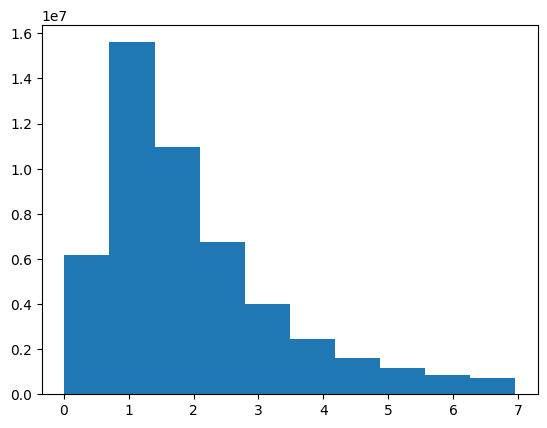

In [40]:
# Crear el histograma
plt.hist(df_withoutliers['trip_distance'])
plt.show()

Fuentes

kW:
- https://www.energysage.com/local-data/electricity-cost/#:~:text=As%20of%20February%202023%2C%20the,based%20on%20where%20you%20live.

Fuel:
- https://www.eia.gov/petroleum/gasdiesel/

Maintenance:
- https://wrrv.com/the-average-cost-of-car-maintenance-per-year-in-new-york/
-->
- https://www.thebalancemoney.com/average-car-maintenance-cost-4775765#:~:text=If%20you%20drive%2010%2C000%20miles,to%20budget%20for%20these%20expenses.

Maintenance electric cars:
- https://www.greencars.com/es-us/perspectivas-de-expertos/costo-de-mantenimiento-de-un-automovil-electrico
